In [1]:
from PIL import Image
import numpy as numpy
img = Image.open('bird.png')
img.show()

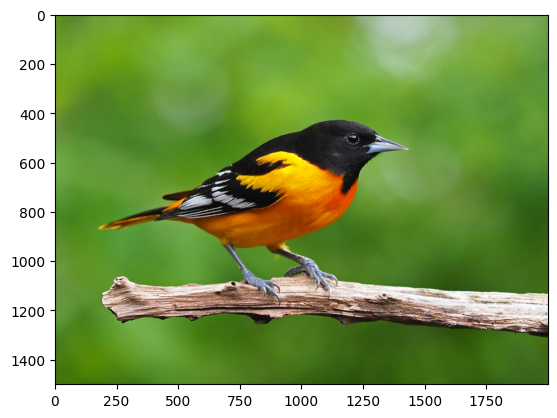

In [3]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

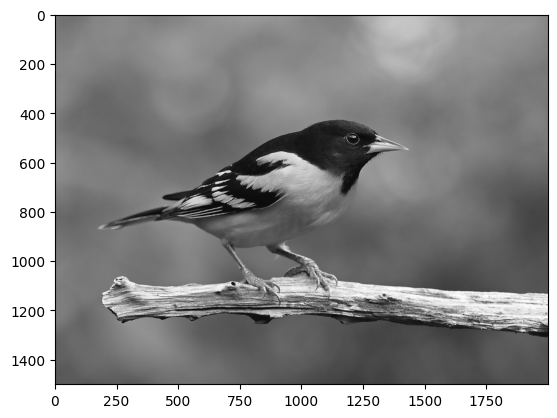

In [5]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('bird.png', mode='L')  # Đọc ảnh ở dạng grayscale
plt.imshow(data, cmap='gray')            # cmap='gray' để hiển thị đúng màu xám
plt.show()


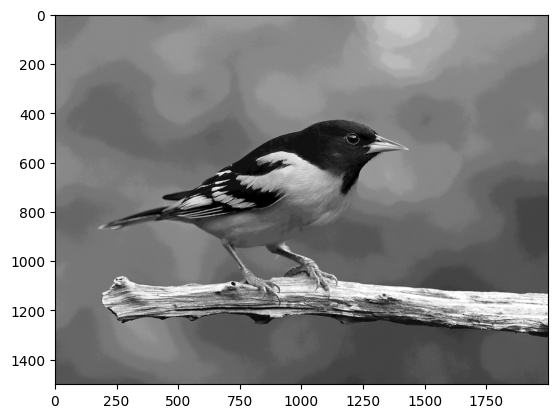

In [7]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh ở dạng grayscale đúng cách
data = iio.imread('bird.png', mode='L').astype(np.uint8)

# Áp dụng mặt nạ để chỉ giữ lại 4 bit cao
cl = data & 0xF0

# Lưu ảnh kết quả
iio.imsave('birdf0.png', cl)

# Hiển thị ảnh
plt.imshow(cl, cmap='gray')
plt.show()


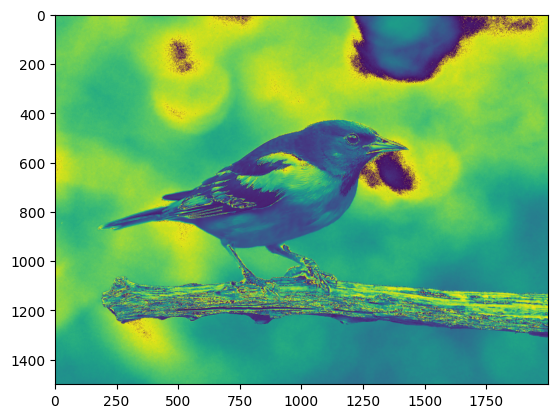

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt


data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

In [10]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.hsv_to_rgb(1, 1, 255)
print(d)


(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


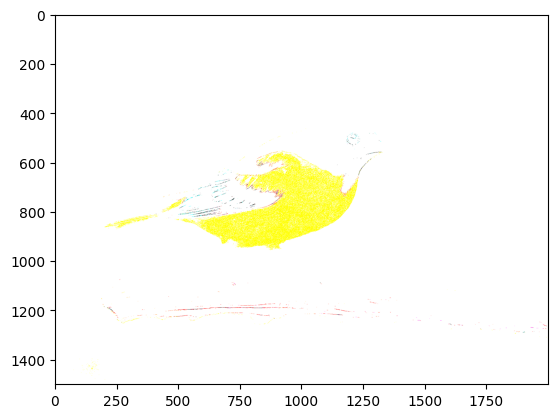

In [14]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

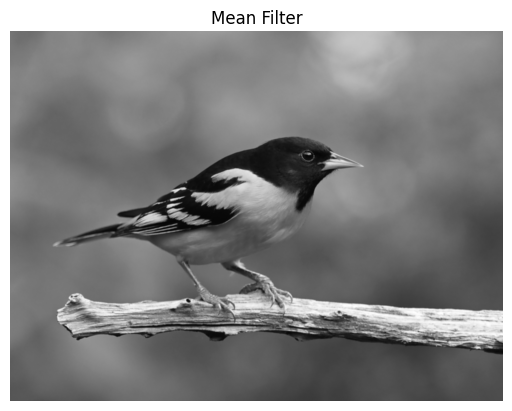

In [16]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt  # sửa lại import chính xác
import colorsys

# Đọc ảnh xám
a = iio.imread('bird.png', mode='L')

# Khởi tạo bộ lọc trung bình 5x5
k = np.ones((5, 5)) / 25

# Áp dụng bộ lọc trung bình
b = sn.convolve(a, k).astype(np.uint8)

# Lưu ảnh đã xử lý
iio.imwrite('bird_mean_filter.png', b)

# Hiển thị ảnh
plt.imshow(b, cmap='gray')  # cmap='gray' để hiển thị ảnh xám đúng
plt.axis('off')
plt.title('Mean Filter')
plt.show()


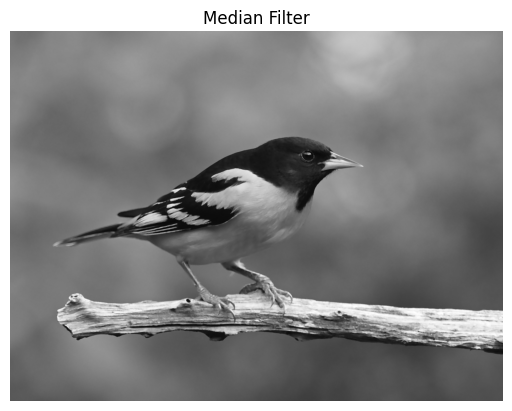

In [18]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import colorsys

# Đọc ảnh dưới dạng grayscale
a = iio.imread('bird.png', mode='L').astype(np.uint8)

# Áp dụng bộ lọc trung vị (median filter) với size=5
b = sn.median_filter(a, size=5, mode='reflect')

# Lưu ảnh sau khi lọc
iio.imwrite('bird_median_filter.png', b)

# Hiển thị ảnh
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.title('Median Filter')
plt.show()


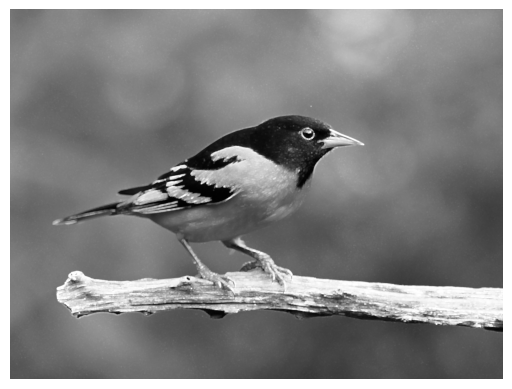

In [24]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt

# Mở ảnh grayscale (8-bit)
a = iio.imread('bird.png', mode='L').astype(np.uint8)

# Thực hiện maximum filter
b = sn.maximum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)

# Lưu ảnh kết quả
iio.imsave('bird_max_filter.png', b)

# Hiển thị ảnh
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()


[[118 118 117 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 ...
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  78  78  78]]


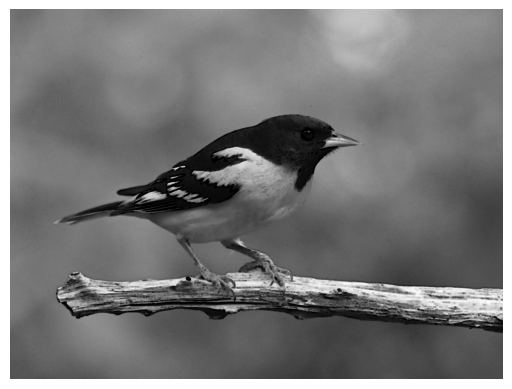

In [26]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt

# Mở ảnh grayscale 8-bit (mode='L')
a = iio.imread('bird.png', mode='L').astype(np.uint8)

# Thực hiện minimum filter với kernel size=5
b = sn.minimum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)

# Lưu ảnh kết quả
iio.imsave('bird_min_filter.png', b)

# In ra mảng kết quả
print(b)

# Hiển thị ảnh kết quả với colormap grayscale
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()


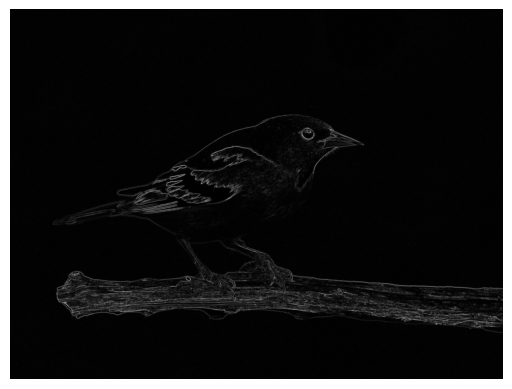

In [30]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt

# Đọc ảnh grayscale
a = iio.imread('bird.png', mode='L')

# Áp dụng Sobel filter
b = filters.sobel(a)

# Chuẩn hóa kết quả về 0–255 rồi chuyển sang uint8
b_norm = (255 * (b / np.max(b))).astype(np.uint8)

# Lưu ảnh kết quả
iio.imsave('bird_sobel_filter_edge_detection.png', b_norm)

# Hiển thị ảnh
plt.imshow(b_norm, cmap='gray')
plt.axis('off')
plt.show()


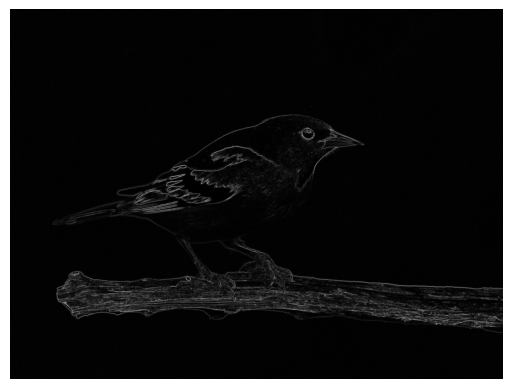

In [32]:
import numpy as np
import imageio.v2 as iio
from skimage import filters
import matplotlib.pylab as plt

# Đọc ảnh ở chế độ grayscale
a = iio.imread('bird.png', mode='L')

# Áp dụng bộ lọc Prewitt để phát hiện biên
b = filters.prewitt(a)

# Chuẩn hóa ảnh về 0–255 rồi chuyển sang kiểu uint8
b_uint8 = (255 * (b / np.max(b))).astype(np.uint8)

# Lưu ảnh kết quả
iio.imsave('bird_prewitt_filter_edge_detection.png', b_uint8)

# Hiển thị ảnh
plt.imshow(b_uint8, cmap='gray')
plt.axis('off')
plt.show()


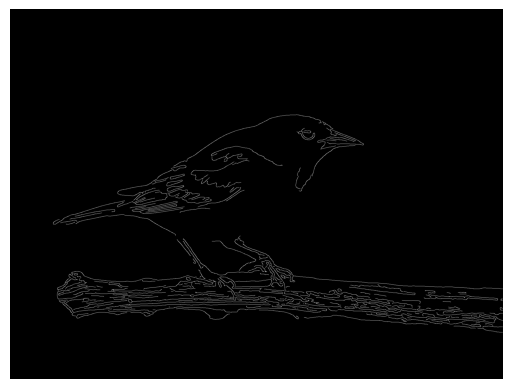

In [33]:
import numpy as np
import imageio.v2 as iio
from skimage import feature
import matplotlib.pylab as plt

# Đọc ảnh grayscale
a = iio.imread('bird.png', mode='L')

# Áp dụng bộ lọc Canny để phát hiện biên (sigma=3 xác định độ mượt Gaussian)
b = feature.canny(a, sigma=3)

# Chuyển ảnh boolean sang uint8 để lưu
b_uint8 = (b * 255).astype(np.uint8)

# Lưu kết quả
iio.imsave('bird_canny_filter_edge_detection.png', b_uint8)

# Hiển thị ảnh
plt.imshow(b_uint8, cmap='gray')
plt.axis('off')
plt.show()


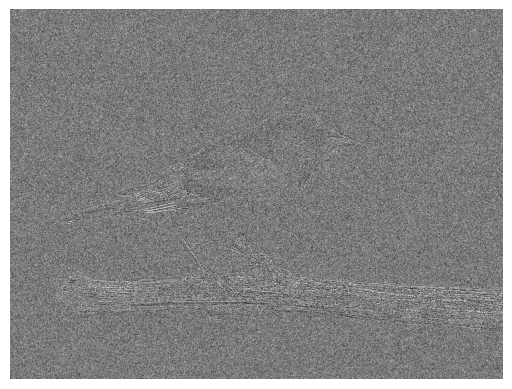

In [35]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt

# Đọc ảnh ở chế độ grayscale
a = iio.imread('bird.png', mode='L')

# Áp dụng bộ lọc Laplace để phát hiện biên
b = sn.laplace(a, mode='reflect')

# Chuẩn hóa kết quả về 0–255
b_uint8 = np.clip((b - b.min()) / (b.max() - b.min()) * 255, 0, 255).astype(np.uint8)

# Lưu ảnh kết quả
iio.imsave('bird_laplace_filter_edge_detection.png', b_uint8)

# Hiển thị ảnh
plt.imshow(b_uint8, cmap='gray')
plt.axis('off')
plt.show()
